# Homework 2: Multivariate Linear Regression
`16340237 吴聪`

## Prepare

1.导入模块

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.读取训练数据和测试数据

In [10]:
trainData = pd.read_csv('dataForTraining.txt', sep=' ', header=None)
trainData.columns = ['size', 'distance', 'price']
trainData

,size,distance,price
0,101,1.70,641.48
1,120,2.30,722.30
2,115,4.00,569.43
3,123,2.80,706.34
4,98,1.20,657.44
5,111,0.30,806.38
6,85,0.92,589.95
7,76,3.32,351.39
8,78,4.80,261.71
9,92,2.70,504.31


In [19]:
classes = trainData['size'].unique()
classes

array([101, 120, 115, 123,  98, 111,  85,  76,  78,  92,  84, 142,  97,
        75,  89, 159, 100, 102, 134,  88,  68,  65, 132, 144, 116, 108,
        62,  99, 118,  61, 150, 122,  71,  86,  77,  93,  91, 112, 121,
       107, 143], dtype=int64)

In [37]:
pos_class = np.random.choice(classes)
pos_class

108

In [44]:
trainData.loc[trainData['size']==pos_class, 'distance'].values[0]

3.86

In [52]:
np.random.choice(2, size = 2, replace = False)

array([0, 1])

In [3]:
testData = pd.read_csv('dataForTesting.txt', sep=' ', header=None)
testData.columns = ['size', 'distance', 'price']
testData

,size,distance,price
0,93,0.78,637.07
1,104,3.82,494.08
2,110,4.27,502.26
3,69,5.20,166.46
4,80,1.22,521.05
5,79,0.87,539.17
6,128,5.54,530.48
7,107,4.51,465.21
8,75,3.20,347.30
9,96,1.55,602.54


## Ex1

1.分析

这是一个二元线性回归问题，假设完美模型为 $f(x)$，则有

$$
y=f(x)+\epsilon
$$

其中 $\epsilon$ 由于噪声引起，是不可避免的，而线性回归的目的则是找找到 $y$。

对于单个数据点：

$$
y=\theta_{size}x_{size}+\theta_{dis}x_{dis}+\theta_{b}
=\begin{bmatrix}x_{size}&x_{dis}&1\end{bmatrix}\cdot\begin{bmatrix}\theta_{size}\\\theta_{dis}\\\theta_{b}\end{bmatrix}
$$

对于多个数据点（数据集）：

$$
Y = X\theta
= \begin{bmatrix}x_{size0}&x_{dis0}&1\\x_{size1}&x_{dis1}&1\\...&...&1\\x_{size49}&x_{dis49}&1\end{bmatrix}\begin{bmatrix}\theta_{size}\\\theta_{dis}\\\theta_{b}\end{bmatrix}
$$

显然我们需要 3 个参数，分别是 $\theta_{size}$，$\theta_{dis}$ 和 $\theta_{b}$。

2.准备数据

In [4]:
# get size and dis cols
train_X = np.array(trainData.iloc[:, 0:2])
# the '1' col
one_col = np.ones(len(trainData))
train_X = np.c_[train_X, one_col]
print(train_X.shape)
# get price cols
train_Y = np.array(trainData.iloc[:, 2]).reshape(-1, 1)
print(train_Y.shape)

(50, 3)
(50, 1)


In [5]:
# get size and dis cols
test_X = np.array(testData.iloc[:, 0:2])
# the '1' col
one_col = np.ones(len(testData))
test_X = np.c_[test_X, one_col]
print(test_X.shape)
# get price cols
test_Y = np.array(testData.iloc[:, 2]).reshape(-1, 1)
print(test_Y.shape)

(10, 3)
(10, 1)


In [6]:
# thetas: 0 -> theta_size, 1 -> theta_dis, 2 -> theta_b
thetas = np.zeros([3, 1])
thetas

array([[0.],
       [0.],
       [0.]])

3.误差计算<br/>
直接使用线性回归的损失函数来计算误差，也即均方误差（MSE）：

$$
J(\theta)=\frac{1}{2m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2
$$

In [7]:
def my_MSE(predict, real):
    ret = (predict - real)**2
    return ret.sum()/(2*len(ret))

4.训练

In [8]:
def my_GD(lr, num_epochs, stride, train_X, train_Y, test_X, test_Y):
    # reset thetas when begin to train
    thetas = np.zeros([3, 1])
    xs = range(1, num_epochs//stride+1)
    train_ys = []
    test_ys = []

    for i in range(num_epochs):
        train_predict = np.matmul(train_X, thetas)
        lhs = train_Y - train_predict
        grad = np.multiply(lhs, train_X)
        thetas += lr * (grad.sum(axis=0).reshape(-1, 1)/len(grad))
        if (i + 1) % stride == 0:
            train_mse = my_MSE(train_predict, train_Y)
            train_ys.append(train_mse)

            test_predict = np.matmul(test_X, thetas)
            test_mse = my_MSE(test_predict, test_Y)
            test_ys.append(test_mse)

            print('Epoch:{}/{}.\ttrain mse:{},\ttest mse:{}'.format(i+1, num_epochs, train_mse, test_mse))
    return xs, train_ys, test_ys

# hyper-parameter
lr = 15e-5
# iter times
num_epochs = 1500000
stride = 100000
xs, train_ys, test_ys = my_GD(lr, num_epochs, stride, train_X, train_Y, test_X, test_Y)

Epoch:100000/1500000.	train mse:33.50439763530972,	test mse:62.231649294656776
Epoch:200000/1500000.	train mse:7.529741700253068,	test mse:59.7276458396198
Epoch:300000/1500000.	train mse:2.9080670041460843,	test mse:62.93605944919011
Epoch:400000/1500000.	train mse:2.085731684285176,	test mse:65.04823429940518
Epoch:500000/1500000.	train mse:1.9394134289436207,	test mse:66.07420205819326
Epoch:600000/1500000.	train mse:1.9133789983055067,	test mse:66.53099665392111
Epoch:700000/1500000.	train mse:1.908746687886865,	test mse:66.72795515400352
Epoch:800000/1500000.	train mse:1.907922460151193,	test mse:66.81179628825213
Epoch:900000/1500000.	train mse:1.907775805178013,	test mse:66.84729728726312
Epoch:1000000/1500000.	train mse:1.907749710835131,	test mse:66.86229631505803
Epoch:1100000/1500000.	train mse:1.907745067864511,	test mse:66.86862745455558
Epoch:1200000/1500000.	train mse:1.9077442417400179,	test mse:66.87129880347348
Epoch:1300000/1500000.	train mse:1.907744094747531,	test 

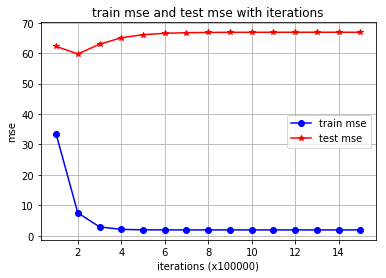

In [9]:
l1, = plt.plot(xs, train_ys, 'bo-')
l2, = plt.plot(xs, test_ys, 'r*-')
plt.grid()
plt.axis()
plt.ylabel('mse')
plt.xlabel('iterations (x100000)')
plt.title('train mse and test mse with iterations')
plt.legend(handles=[l1, l2], labels=['train mse', 'test mse'], loc='best')
plt.show()

## Ex2

1.修改学习率，迭代次数并重新训练回归模型

In [10]:
# hyper-parameter
lr = 2e-4
# iter times
num_epochs = 15000
stride = 1000
xs, train_ys, test_ys = my_GD(lr, num_epochs, stride, train_X, train_Y, test_X, test_Y)

Epoch:1000/15000.	train mse:8.307924157258049e+147,	test mse:9.724652226486053e+147
Epoch:2000/15000.	train mse:1.1811415045179194e+291,	test mse:1.3825584037945984e+291
Epoch:3000/15000.	train mse:inf,	test mse:inf
Epoch:4000/15000.	train mse:inf,	test mse:inf
Epoch:5000/15000.	train mse:nan,	test mse:nan
Epoch:6000/15000.	train mse:nan,	test mse:nan
Epoch:7000/15000.	train mse:nan,	test mse:nan
Epoch:8000/15000.	train mse:nan,	test mse:nan
Epoch:9000/15000.	train mse:nan,	test mse:nan
Epoch:10000/15000.	train mse:nan,	test mse:nan
Epoch:11000/15000.	train mse:nan,	test mse:nan


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in add
  if sys.path[0] == '':


Epoch:12000/15000.	train mse:nan,	test mse:nan
Epoch:13000/15000.	train mse:nan,	test mse:nan
Epoch:14000/15000.	train mse:nan,	test mse:nan
Epoch:15000/15000.	train mse:nan,	test mse:nan


将学习率从 `15e-5` 上调到 `2e-4` 之后，发现 train mse 和 test mse 都为 nan

可以发现，nan 出现的原因是因为 overflow（报错提示）。

一般来说，这种情况的出现有比较多种的原因：
* 损失函数计算处有问题（比如损失函数中使用 log 且传入了 0，log0 产生 nan）
* 脏数据，有不当的输入（比如输入中就有 nan）
* 梯度爆炸

在学习率较小的时候训练能够正常进行，说明不存在脏数据；我们使用的损失函数是均方误差，不包含 log，说明不是损失函数的问题。

学习率如果过高，容易导致梯度爆炸。我们刚刚调高了学习率，这个问题应该就是这样产生的。

所以如果要解决这个问题，有如下方法：
* 减小学习率
* 数据归一化/标准化

这里我们尝试使用 Z-score 标准化方法对数据进行标准化

2.使用 zero-mean normalization 进行数据标准化

In [11]:
def my_Norm(data):
    mean_data = np.mean(data, axis=0)
    var_data = np.var(data, axis=0)
    return (data-mean_data)/np.sqrt(var_data)

In [12]:
# get size and dis cols
train_X = np.array(trainData.iloc[:, 0:2])
norm_train_X = my_Norm(train_X)
# the '1' col
one_col = np.ones(len(trainData))
norm_train_X = np.c_[norm_train_X, one_col]
train_X = np.c_[train_X, one_col]
print(norm_train_X.shape)
# get price cols
train_Y = np.array(trainData.iloc[:, 2]).reshape(-1, 1)
norm_train_Y = my_Norm(train_Y)
print(norm_train_Y.shape)

(50, 3)
(50, 1)


In [13]:
# get size and dis cols
test_X = np.array(testData.iloc[:, 0:2])
norm_test_X = my_Norm(test_X)
# the '1' col
one_col = np.ones(len(testData))
norm_test_X = np.c_[norm_test_X, one_col]
test_X = np.c_[test_X, one_col]
print(norm_test_X.shape)
# get price cols
test_Y = np.array(testData.iloc[:, 2]).reshape(-1, 1)
norm_test_Y = my_Norm(test_Y)
print(norm_test_Y.shape)

(10, 3)
(10, 1)


修改迭代次数为 `100000` 次

In [14]:
# hyper-parameter
lr = 2e-4
# iter times
num_epochs = 100000
stride = 5000
xs, train_ys, test_ys = my_GD(lr, num_epochs, stride, norm_train_X, norm_train_Y, norm_test_X, norm_test_Y)

Epoch:5000/100000.	train mse:0.18913994544190374,	test mse:0.17972042049399628
Epoch:10000/100000.	train mse:0.073610764218778,	test mse:0.06485220582346042
Epoch:15000/100000.	train mse:0.028767962690841125,	test mse:0.02451277840426512
Epoch:20000/100000.	train mse:0.01126750913985075,	test mse:0.011722778027943094
Epoch:25000/100000.	train mse:0.004433277885195497,	test mse:0.008635675062683252
Epoch:30000/100000.	train mse:0.0017641823876721075,	test mse:0.008635594341126393
Epoch:35000/100000.	train mse:0.0007217626039847851,	test mse:0.00939189556853257
Epoch:40000/100000.	train mse:0.00031464332533016247,	test mse:0.010160566502487612
Epoch:45000/100000.	train mse:0.00015564199771767005,	test mse:0.010756691883301382
Epoch:50000/100000.	train mse:9.354367931409697e-05,	test mse:0.011174471914282603
Epoch:55000/100000.	train mse:6.929104435820779e-05,	test mse:0.011453233691939697
Epoch:60000/100000.	train mse:5.9819124384169784e-05,	test mse:0.011634347417031222
Epoch:65000/1000

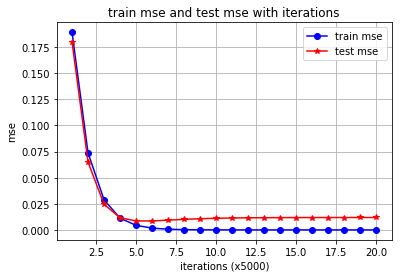

In [15]:
l1, = plt.plot(xs, train_ys, 'bo-')
l2, = plt.plot(xs, test_ys, 'r*-')
plt.grid()
plt.axis()
plt.ylabel('mse')
plt.xlabel('iterations (x5000)')
plt.title('train mse and test mse with iterations')
plt.legend(handles=[l1, l2], labels=['train mse', 'test mse'], loc='best')
plt.show()

3.使用 `15e-5` 的学习率，`100000` 的迭代次数以及标准化后的数据重新训练回归模型

这一步主要是方便和 `2e-4` 学习率的训练结果进行比对，之前的训练并未对数据进行标准化。

In [16]:
# hyper-parameter
lr = 15e-5
# iter times
num_epochs = 100000
stride = 5000
xs, train_ys, test_ys = my_GD(lr, num_epochs, stride, norm_train_X, norm_train_Y, norm_test_X, norm_test_Y)

Epoch:5000/100000.	train mse:0.23998148092270807,	test mse:0.23176420877106446
Epoch:10000/100000.	train mse:0.11787218025294996,	test mse:0.10794102028234372
Epoch:15000/100000.	train mse:0.058188772119662016,	test mse:0.050398767853211304
Epoch:20000/100000.	train mse:0.028767565046916865,	test mse:0.024513526832623974
Epoch:25000/100000.	train mse:0.01423881722863849,	test mse:0.013587935142378651
Epoch:30000/100000.	train mse:0.007061679469007901,	test mse:0.009531371288170427
Epoch:35000/100000.	train mse:0.0035159460687108424,	test mse:0.008480807807795213
Epoch:40000/100000.	train mse:0.0017642153772254251,	test mse:0.00863555263765054
Epoch:45000/100000.	train mse:0.0008987894176956443,	test mse:0.009186711039092126
Epoch:50000/100000.	train mse:0.00047123365316749496,	test mse:0.009793028713283742
Epoch:55000/100000.	train mse:0.00026000361916662094,	test mse:0.010327466886193497
Epoch:60000/100000.	train mse:0.0001556473407245838,	test mse:0.010756638792471634
Epoch:65000/100

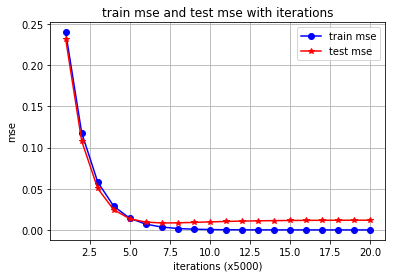

In [17]:
l1, = plt.plot(xs, train_ys, 'bo-')
l2, = plt.plot(xs, test_ys, 'r*-')
plt.grid()
plt.axis()
plt.ylabel('mse')
plt.xlabel('iterations (x5000)')
plt.title('train mse and test mse with iterations')
plt.legend(handles=[l1, l2], labels=['train mse', 'test mse'], loc='best')
plt.show()

4.总结

对数据进行标准化后进行训练，比对学习率为 `2e-4` 和 `15e-5` 的训练结果。

容易发现当学习率为 `2e-4` 时，训练集在第 60000 次迭代时，误差基本已经收敛不再变动；而当学习率为 `15e-5` 时，训练集在第 80000 次迭代，误差基本已经收敛不再变动。学习率较大的情况下，误差收敛速度更快。

注意，两次训练中都出现了一定程度的过拟合现象：训练集上的误差不断减小，但测试集的误差开始下降后面略有回升。

## Ex3

1.采用随机梯度下降法进行梯度下降

In [18]:
def my_SGD(lr, num_epochs, stride, train_X, train_Y, test_X, test_Y):
    # reset thetas when begin to train
    thetas = np.zeros([3, 1])
    xs = range(1, num_epochs//stride+1)
    train_ys = []
    test_ys = []

    for i in range(num_epochs):

        random_i = np.random.randint(0,50)
        random_x =  train_X[random_i] 
        random_predict = np.matmul(random_x, thetas)
        lhs = train_Y[random_i] - random_predict
        grad = np.multiply(lhs, random_x)
        thetas += lr * grad.reshape(-1, 1)
        if (i + 1) % stride == 0:
            train_predict = np.matmul(train_X, thetas)
            train_mse = my_MSE(train_predict, train_Y)
            train_ys.append(train_mse)

            test_predict = np.matmul(test_X, thetas)
            test_mse = my_MSE(test_predict, test_Y)
            test_ys.append(test_mse)

            print('Epoch:{}/{}.\ttrain mse:{},\ttest mse:{}'.format(i+1, num_epochs, train_mse, test_mse))
    return xs, train_ys, test_ys

lr = 15e-5
num_epochs = 100000
stride = 5000
xs, train_ys, test_ys = my_SGD(lr, num_epochs, stride, norm_train_X, norm_train_Y, norm_test_X, norm_test_Y)

Epoch:5000/100000.	train mse:0.23893586824383045,	test mse:0.23150274570825619
Epoch:10000/100000.	train mse:0.11791384420351765,	test mse:0.1086213416051485
Epoch:15000/100000.	train mse:0.05838045768651989,	test mse:0.050981361640174916
Epoch:20000/100000.	train mse:0.029299345043102772,	test mse:0.025059803662543994
Epoch:25000/100000.	train mse:0.014682293528985101,	test mse:0.013803208412366746
Epoch:30000/100000.	train mse:0.007346705909675436,	test mse:0.009676438300955102
Epoch:35000/100000.	train mse:0.0036730145990286024,	test mse:0.008567126547686172
Epoch:40000/100000.	train mse:0.00186149173437137,	test mse:0.008734154565300445
Epoch:45000/100000.	train mse:0.0009490315758425359,	test mse:0.009200868580504482
Epoch:50000/100000.	train mse:0.0005009017425993852,	test mse:0.009718596626629456
Epoch:55000/100000.	train mse:0.0002745432302383206,	test mse:0.010301037578323962
Epoch:60000/100000.	train mse:0.00016081777032395605,	test mse:0.01079026995538307
Epoch:65000/100000.

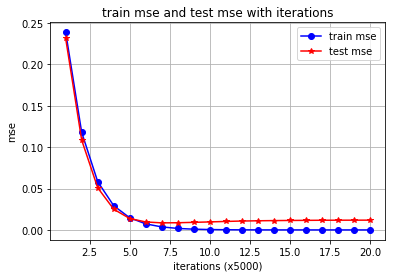

In [19]:
l1, = plt.plot(xs, train_ys, 'bo-')
l2, = plt.plot(xs, test_ys, 'r*-')
plt.grid()
plt.axis()
plt.ylabel('mse')
plt.xlabel('iterations (x5000)')
plt.title('train mse and test mse with iterations')
plt.legend(handles=[l1, l2], labels=['train mse', 'test mse'], loc='best')
plt.show()

在 `my_SGD` 的实现中，对于一次迭代，我仅仅将其理解为一次迭代，而非一次 epoch。因此对于本实验，在一个迭代里仅下降 1 次，而不是 50 次。

由输出数据和图表可知，随机梯度下降和梯度下降在训练结果上表现差不多，都是在第 80000 次迭代，误差基本收敛不再变动。

我认为这是因为数据标准化的原因，因为老师提供的数据集实际上是比较分散的，如果下降次数相同，那么梯度下降的方法显然是应该要比随机梯度下降要更加准确表现更好的。

于是，使用未标准化数据采用随机梯度下降进行训练。


2.使用未标准化数据采用随机梯度下降进行训练

为能够与梯度下降产生训练结果的比对，将 num_epochs 重新设置为 `1500000`

In [20]:
lr = 15e-5
num_epochs = 1500000
stride = 100000
xs, train_ys, test_ys = my_SGD(lr, num_epochs, stride, train_X, train_Y, test_X, test_Y)

Epoch:100000/1500000.	train mse:327.0880076621042,	test mse:524.5320304502509
Epoch:200000/1500000.	train mse:20.264508564313772,	test mse:115.7699891242165
Epoch:300000/1500000.	train mse:90.02446886966185,	test mse:4.677196180592906
Epoch:400000/1500000.	train mse:2.9892183912238868,	test mse:50.8118642552349
Epoch:500000/1500000.	train mse:4.118674767715578,	test mse:49.770813540050106
Epoch:600000/1500000.	train mse:4.663767725489996,	test mse:92.82344772353301
Epoch:700000/1500000.	train mse:4.104582693856347,	test mse:48.40388813734264
Epoch:800000/1500000.	train mse:26.71442352077586,	test mse:163.28239641737625
Epoch:900000/1500000.	train mse:15.958358618945836,	test mse:135.25273861486806
Epoch:1000000/1500000.	train mse:5.5793961551313815,	test mse:41.66781197225557
Epoch:1100000/1500000.	train mse:1.990162675696932,	test mse:62.6420099231873
Epoch:1200000/1500000.	train mse:8.423736887617043,	test mse:110.35929927559096
Epoch:1300000/1500000.	train mse:3.356858488846596,	tes

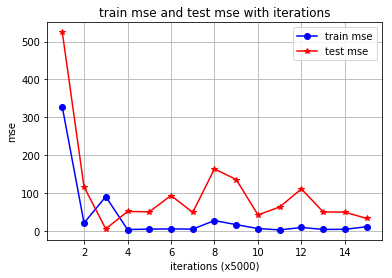

In [21]:
l1, = plt.plot(xs, train_ys, 'bo-')
l2, = plt.plot(xs, test_ys, 'r*-')
plt.grid()
plt.axis()
plt.ylabel('mse')
plt.xlabel('iterations (x5000)')
plt.title('train mse and test mse with iterations')
plt.legend(handles=[l1, l2], labels=['train mse', 'test mse'], loc='best')
plt.show()

在未标准化数据上采用随机梯度下降进行训练，此时就能明显看到随机梯度下降法的振荡非常严重，到最后误差也没有收敛。不过误差没有收敛这一点感觉还是和老师提供的训练集数据太少有关，模型的泛化能力太差。

数据标准化与否的训练结果的比对也充分反映了数据标准化的重要性！